In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Import utilities

# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

sklearn: 0.21.2


In [3]:
# Define estimators to be used.  This time it is Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [4]:
# Load input file
rawData = pd.read_csv('default of credit card clients.csv', header=1)

In [5]:
# Take a look at the data
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# See what it is made of.
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [7]:
# Preprocess the data file.  Drop unneeded attributes.
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [8]:
#dependent variable
depVar = rawData['PAY_AMT6']
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
xTrain, xTest, yTrain, yTest = train_test_split(features, depVar, test_size = 0.3, random_state = 0)
xTrain.shape, xTest.shape

((21000, 11), (9000, 11))

In [13]:
#Training Set (Feature Space: X Training)
#X_train = (features[: 21000])
xTrain.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
15925,0,0,0,0,0,0,0,0,0,0,0
10062,29070,31302,29192,28170,28763,28453,3019,6,991,1032,1310
19376,2252,2265,24667,40626,9255,8659,2265,24905,40827,30844,8695
6384,17807,18520,39053,20055,19606,19925,1298,1909,1666,5000,703
15976,18704,18106,19793,19378,18874,19361,0,2000,1500,1000,2000


In [14]:
#Dependent Variable Training Set (y Training)
#y_train = depVar[: 21000]
yTrain_count = len(yTrain.index)
print('The number of observations in the Y training set are:',str(yTrain_count))
yTrain.head()

The number of observations in the Y training set are: 21000


15925       0
10062    2000
19376    3532
6384      775
15976    1000
Name: PAY_AMT6, dtype: int64

In [15]:
#Testing Set (X Testing)
#X_test = features[-9000:]
xTest_count = len(xTest.index)
print('The number of observations in the feature testing set is:',str(xTest_count))
print(xTest.head())

The number of observations in the feature testing set is: 9000
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
8225       17971      17399      19057      18453      19755      19288   
10794      16528      19347      18600      19000      19000      20000   
9163        3884        949       2864        933          0          0   
26591      98430      99998      16138      17758      18774      20272   
6631        4583       6917        831       6469       5138       7810   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
8225          0      2260         0      1600         0  
10794      3400         0      1000         0      1000  
9163        949      2873       933         0         0  
26591      5000      2000      2000      2000      2000  
6631       6989       833      6488      5153      7833  


In [16]:
#Ground Truth (y_test) 
#y_test = depVar[-9000:]
yTest_count = len(yTest.index)
print('The number of observations in the Y training set are:',str(yTest_count))
yTest.head()

The number of observations in the Y training set are: 9000


8225      644
10794       0
9163        0
26591    2000
6631     7130
Name: PAY_AMT6, dtype: int64

In [17]:
#Models
modelSVR = SVR(gamma='scale')
modelRF = RandomForestRegressor(n_estimators=100)
modelLR = LinearRegression()

In [18]:
#Model Fitting
modelRF.fit(xTrain,yTrain)
print(cross_val_score(modelRF, xTrain, yTrain, cv=5))
modelRF.score(xTrain,yTrain)

[ 0.10267949  0.10884101  0.10090589  0.06624822 -0.07853916]


0.8660442374401871

In [19]:
modelSVR.fit(xTrain,yTrain)
print(cross_val_score(modelSVR, xTrain, yTrain, cv=5)) 
modelSVR.score(xTrain,yTrain)

[-0.02933788 -0.03088467 -0.02969579 -0.03652384 -0.03506022]


-0.030005479719696252

In [20]:
modelLR.fit(xTrain,yTrain)
print(cross_val_score(modelLR, xTrain, yTrain, cv=5)) 
modelLR.score(xTrain,yTrain)

[0.13400566 0.09625579 0.14985479 0.09595195 0.04762202]


0.1309412753696365

In [21]:
# Making RF predictions
predictions = modelRF.predict(xTest)
predRsquared = r2_score(yTest,predictions)
rmse = sqrt(mean_squared_error(yTest, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.068
RMSE: 17611.813


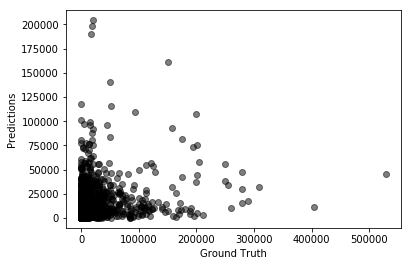

In [22]:
plt.scatter(yTest, predictions, color='black', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [23]:
# Making SVR predictions
predictions = modelSVR.predict(xTest)
predRsquared = r2_score(yTest,predictions)
rmse = sqrt(mean_squared_error(yTest, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.026
RMSE: 18474.238


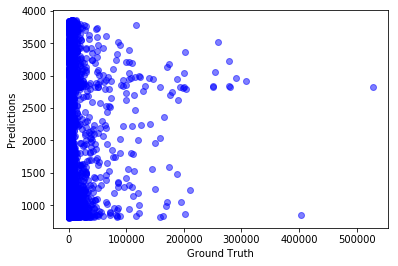

In [24]:
plt.scatter(yTest, predictions, color='blue', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [25]:
# Making Linear Regression predictions
predictions = modelLR.predict(xTest)
predRsquared = r2_score(yTest,predictions)
rmse = sqrt(mean_squared_error(yTest, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.137
RMSE: 16943.969


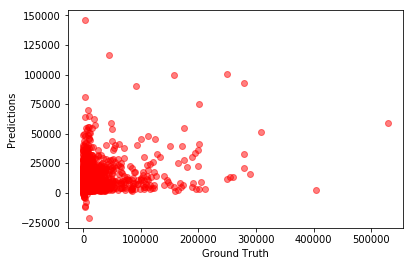

In [26]:
plt.scatter(yTest, predictions, color='red', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();